# Importing Libraries & Reading data

In [38]:
def __init__(data):
    #Importing Libraries
    import pandas as pd
    import numpy as np
    import seaborn as sns #visualisation
    import matplotlib.pyplot as plt #visualisation
    %matplotlib inline 
    sns.set(color_codes=True)
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    
    #Reading the data
    accept = pd.read_csv(data)
    
    return accept

In [39]:
EDA_data = __init__('rejected_2007_to_2018Q4.csv')

# Data Exploration

In [40]:
print("                             ")
print("The first five rows of the data looks like:") 
EDA_data.head()

                             
The first five rows of the data looks like:


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [41]:
print("                             ")
print("The number of rows & columns in the data are:", EDA_data.shape)

                             
The number of rows & columns in the data are: (27648741, 9)


In [42]:
print("                             ")
print("Some more description of the data are:") 
EDA_data.describe()    

                             
Some more description of the data are:


,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


In [43]:
print("                                     ")
print("The datatypes of the features in the data are:")
types = EDA_data.dtypes
types.value_counts()

                                     
The datatypes of the features in the data are:


object     6
float64    3
dtype: int64

# Dealing with irrevalent data & null values

In [44]:
#Dropping columns with null values >= 60%
perc = 60.0 
min_count =  int(((100-perc)/100)*EDA_data.shape[0] + 1)
EDA_data = EDA_data.dropna( axis=1, thresh=min_count)
print("The number of rows & columns after dropping the data having 60% or more null values:", EDA_data.shape)   

The number of rows & columns after dropping the data having 60% or more null values: (27648741, 8)


In [45]:
EDA_data.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,9.43%,209xx,MD,< 1 year,0.0


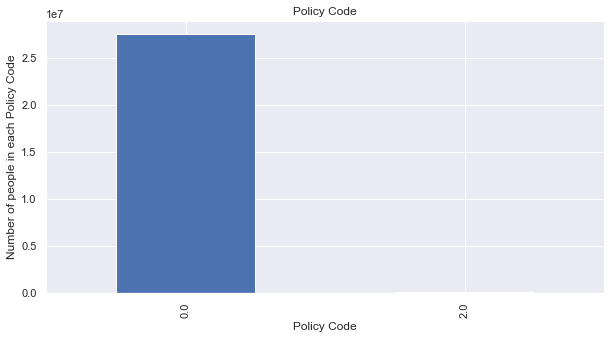

In [46]:
import numpy as np
from matplotlib import pyplot as plt
EDA_data["Policy Code"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Policy Code")
plt.ylabel('Number of people in each Policy Code')
plt.xlabel('Policy Code');
plt.show()

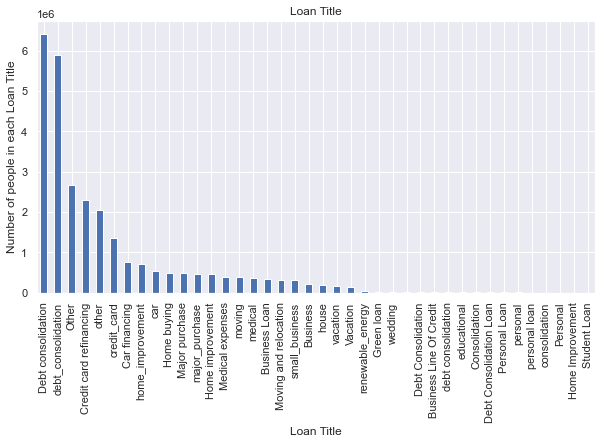

In [47]:
EDA_data["Loan Title"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Loan Title")
plt.ylabel('Number of people in each Loan Title')
plt.xlabel('Loan Title');
plt.show()

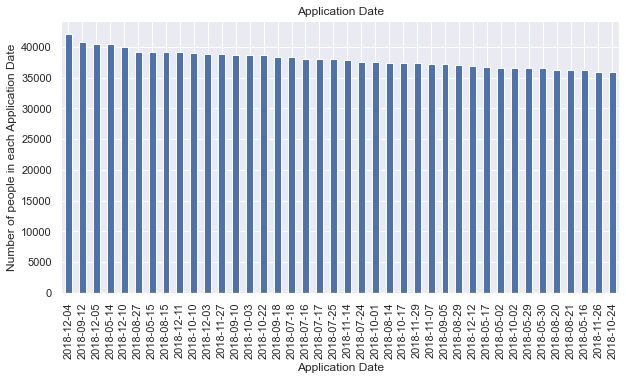

In [48]:
EDA_data["Application Date"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Application Date")
plt.ylabel('Number of people in each Application Date')
plt.xlabel('Application Date');
plt.show()

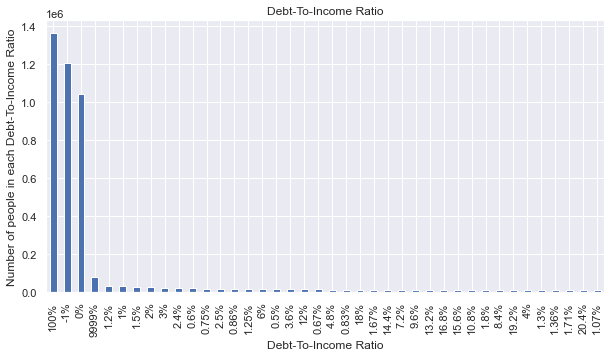

In [49]:
EDA_data["Debt-To-Income Ratio"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Debt-To-Income Ratio")
plt.ylabel('Number of people in each Debt-To-Income Ratio')
plt.xlabel('Debt-To-Income Ratio');
plt.show()

In [50]:
irrevalent_cols = ['Policy Code','Zip Code','State','Application Date']
EDA_data.drop(columns =irrevalent_cols, inplace = True )
print("The number of rows & columns after dropping the null values:", EDA_data.shape)    

The number of rows & columns after dropping the null values: (27648741, 4)


In [51]:
EDA_data.head()

,Amount Requested,Loan Title,Debt-To-Income Ratio,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,10%,4 years
1,1000.0,Consolidating Debt,10%,< 1 year
2,11000.0,Want to consolidate my debt,10%,1 year
3,6000.0,waksman,38.64%,< 1 year
4,1500.0,mdrigo,9.43%,< 1 year


In [52]:
#Filtering data with Loan title
EDA_data1 = EDA_data[(EDA_data['Loan Title'] == 'Debt consolidation') | (EDA_data['Loan Title'] == 'debt_consolidation')]
loan_stat = EDA_data1['Loan Title'].value_counts()
print("We will consider only two types of Loan Title:\n",loan_stat )
print("The number of rows & columns after filtering the values:", EDA_data1.shape)    

We will consider only two types of Loan Title:
 Debt consolidation    6418016
debt_consolidation    5895211
Name: Loan Title, dtype: int64
The number of rows & columns after filtering the values: (12313227, 4)


In [53]:
#Filtering data with Loan status "Fully Paid" & "Charged Off"
EDA_data2 = EDA_data1[(EDA_data1['Debt-To-Income Ratio'] == '100%') | (EDA_data1['Debt-To-Income Ratio'] == '-1%') | (EDA_data1['Debt-To-Income Ratio'] == '0%')]
loan_stat = EDA_data2['Debt-To-Income Ratio'].value_counts()
print("We will consider only two types of Debt-To-Income Ratio:\n", loan_stat )
print("The number of rows & columns after filtering the values:", EDA_data2.shape)    

We will consider only two types of Debt-To-Income Ratio:
 100%    453169
-1%     339589
0%      183366
Name: Debt-To-Income Ratio, dtype: int64
The number of rows & columns after filtering the values: (976124, 4)


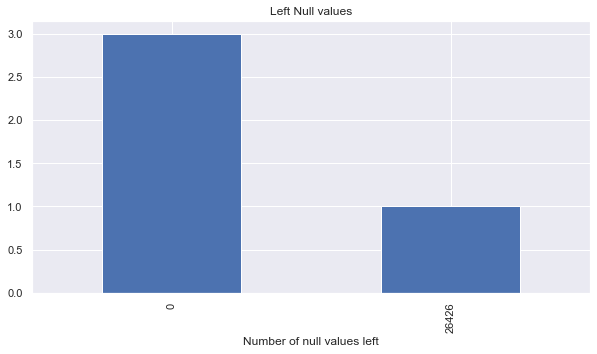

In [54]:
left_null = EDA_data2.isnull().sum()
left_null.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Left Null values")
plt.xlabel('Number of null values left');

In [57]:
#Filling the null values
EDA_data2.fillna(value=0, inplace=True)  

# Categorical Variables

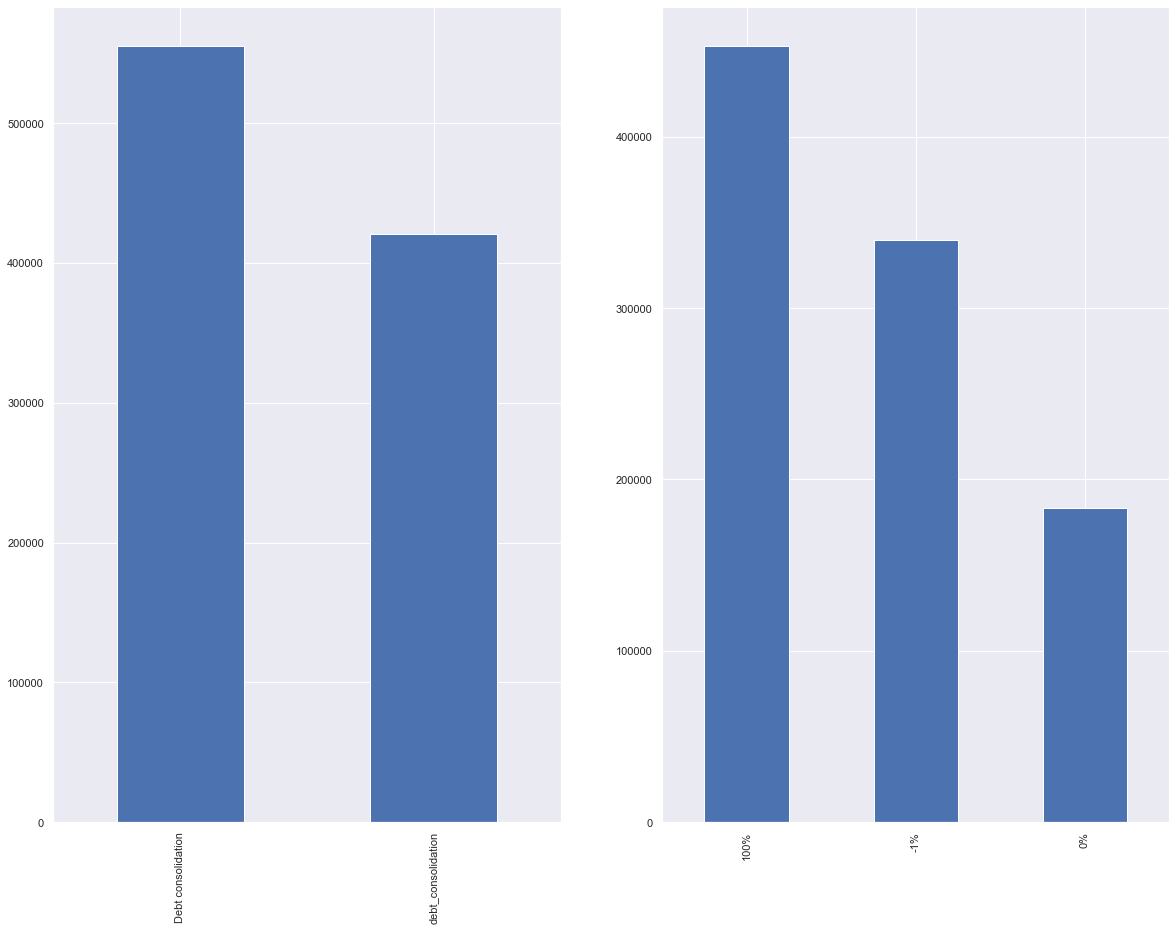

In [58]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, axes = plt.subplots(figsize=(20,15),nrows=1, ncols=2)
EDA_data2['Loan Title'].value_counts().plot(ax=axes[0], kind='bar')
EDA_data2['Debt-To-Income Ratio'].value_counts().plot(ax=axes[1], kind='bar')




plt.show()


In [59]:
EDA_data2['Employment Length'].value_counts()

< 1 year     850405
5 years       82291
0             26426
1 year         5057
10+ years      3418
3 years        2417
2 years        2240
4 years        1580
8 years         823
9 years         558
6 years         529
7 years         380
Name: Employment Length, dtype: int64

In [60]:
#Encoding Categorial variables
EDA_data2['Loan Title'].replace(('Debt consolidation', 'debt_consolidation'),(1 ,0), inplace = True) 
EDA_data2['Debt-To-Income Ratio'].replace(('100%','-1%','0%'),(100,-1,0), inplace  = True) 
EDA_data2['Employment Length'].replace(('< 1 year', '5 years','0','1 year','10+ years','3 years','2 years','4 years','8 years','9 years','6 years','7 years'),(0.5,5,0,1,10,3,2,4,8,9,6,7), inplace = True) 


C:\Users\basua\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [61]:
EDA_data2.head()

,Amount Requested,Loan Title,Debt-To-Income Ratio,Employment Length
2953,30000.0,0,100,10.0
2958,30000.0,0,100,10.0
3019,4000.0,0,0,0.5
3033,13000.0,0,100,0.5
3034,8000.0,0,100,0.5


# Correlation Matrix

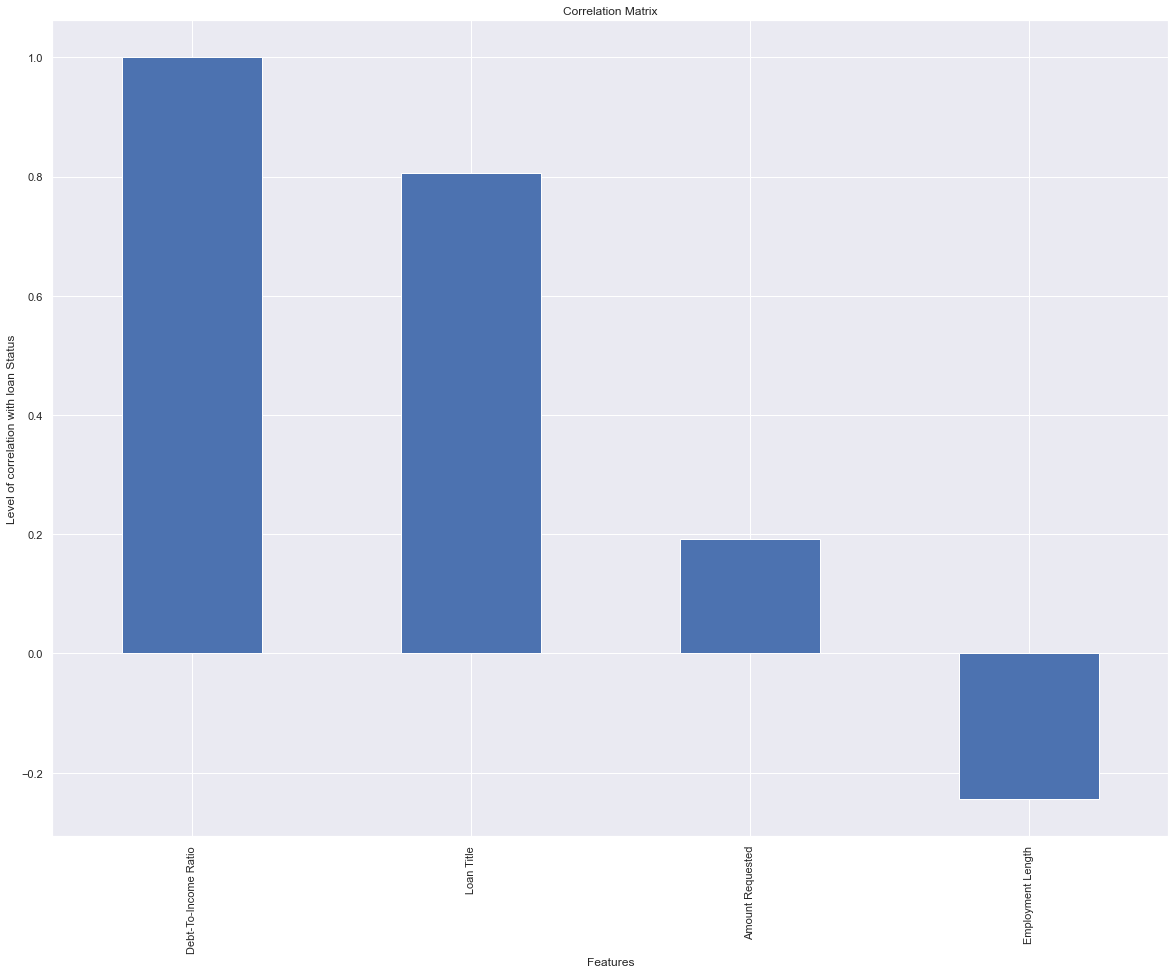

In [64]:
#Correlation between variables
corr_matrix = EDA_data2.corr()
mapp = corr_matrix['Debt-To-Income Ratio'].sort_values(ascending=False)

mapp.nlargest(40).plot(kind='bar', figsize=(20,15))
plt.title("Correlation Matrix")
plt.ylabel('Level of correlation with loan Status')
plt.xlabel('Features');
    
    

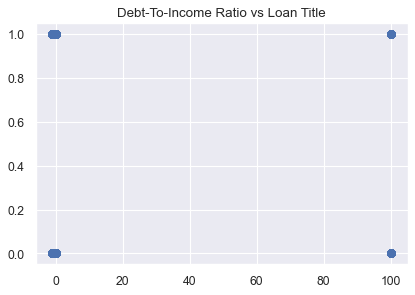

In [81]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(6, 4), dpi=80)
ax1 = fig.add_subplot(111)
ax1.scatter(EDA_data2['Debt-To-Income Ratio'],EDA_data2['Loan Title'])
ax1.set_title('Debt-To-Income Ratio vs Loan Title')
plt.show()


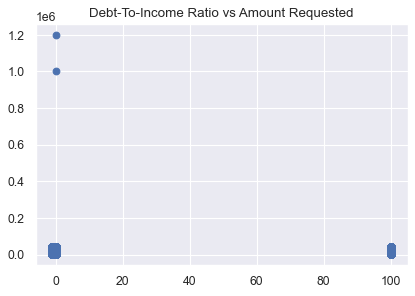

In [80]:
fig = plt.figure(figsize=(6, 4), dpi=80)
ax2 = fig.add_subplot(111)
ax2.scatter(EDA_data2['Debt-To-Income Ratio'],EDA_data2['Amount Requested'])
ax2.set_title('Debt-To-Income Ratio vs Amount Requested')
plt.show()


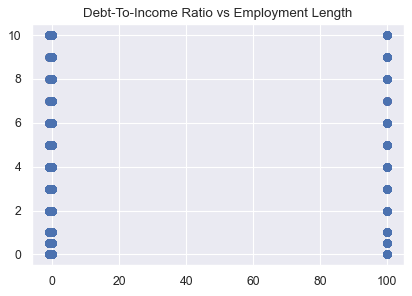

In [79]:
fig = plt.figure(figsize=(6, 4), dpi=80)
ax3 = fig.add_subplot(111)
ax3.scatter(EDA_data2['Debt-To-Income Ratio'],EDA_data2['Employment Length'])
ax3.set_title('Debt-To-Income Ratio vs Employment Length')
plt.show()


# Interpretation

1. The lending club data set consist of features having a lot of null values.
2. There are many irrevalent features that are also present in the dataset like Zip Cde, Policy Code & State
3. After dealing with the null, repetative & irrevalent values the final shape of the dataset became from (27648741, 9) to (976124, 4).
4. The feature "debt to income ratio" is the target variable, it is something that we can predict from the study of this dataset.
5. For the feature "loan title" used the two highest types & dropped the rest. For "debt to income ratio" kept three highest types 100%, -1% & 0% & dropped the other types having miniscule record percent.
6. For all the object type Categorical variables, I have encoded them in the numeric form for the ease of model development. 
7. Finally, the correlation matrix roughly states the weightage of different features. Each of these features can be included in the model & regularization can be used to determine the final features in the final model.